## Observations and Insights 

The standard deviation for the drug Ketapril is larger than any of the other drugs, which reflects a large variation in the mice treated with this drug regimen.

There is a potential outlier for the drug Infubinol indicating further investigation may be necessary to determine how it occurred and how to manage it. 

There is a strong, positive correlation between mouse weight and tumor volume for the Capomulin drug regimen.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice.
merged_df["Mouse ID"].count()

1893

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [21]:
# # Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = merged_df.loc[merged_df["Mouse ID"]=="g989"]
all_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [24]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group = clean_df.groupby("Drug Regimen")
volume_average = drug_group["Tumor Volume (mm3)"].mean()
volume_median = drug_group["Tumor Volume (mm3)"].median()
volume_variance = drug_group["Tumor Volume (mm3)"].var()
volume_std = drug_group["Tumor Volume (mm3)"].std()
volume_sem = drug_group["Tumor Volume (mm3)"].sem()    

regimen_summary = pd.DataFrame({"Mean": volume_average, "Median": volume_median, "Variance": volume_variance, 
                               "Standard Deviation": volume_std, "SEM": volume_sem})
regimen_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary = drug_group.agg(["mean", "median", "var", "std", "sem"])
drug_summary = pd.DataFrame({"Mean": volume_average, "Median": volume_median, "Variance": volume_variance, 
                               "Standard Deviation": volume_std, "SEM": volume_sem})
drug_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

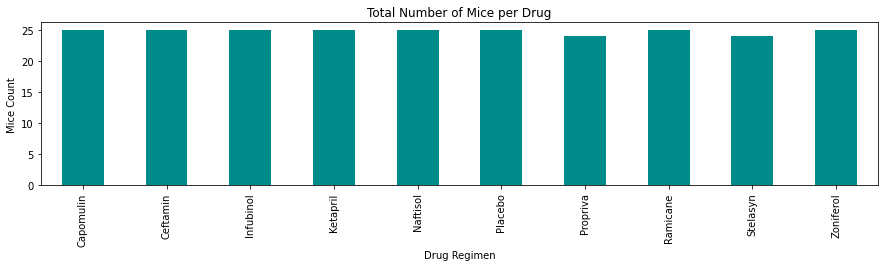

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a bar plot showing the number of unique mice for each treatment using pandas
regimen_data = clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
regimen_data.plot(kind="bar", title="Total Number of Mice per Drug", figsize=(15,3), color="darkcyan")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()
plt.tight_layout()

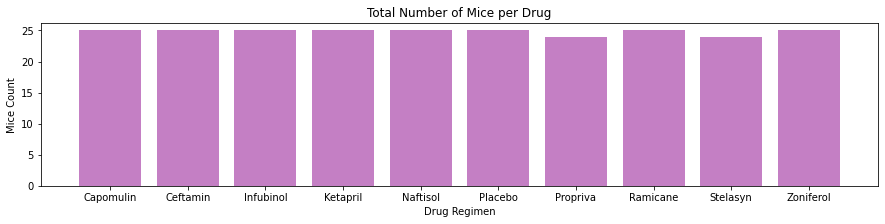

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a bar plot showing the number of unique mice for each treatment using pyplot.
plt.figure(figsize=(15,3))
plt.bar(regimen_data.index.values, regimen_data.values, color='darkmagenta', alpha=0.5, align="center")
plt.title("Total Number of Mice per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()
plt.tight_layout()

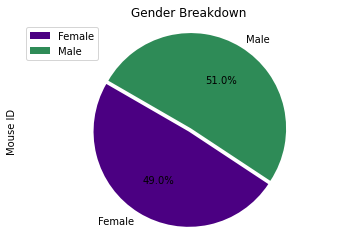

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(clean_df.groupby(["Sex"])["Mouse ID"].count()).reset_index()
colors = ["indigo", "seagreen"]
explode = (.04,0)
gender_data.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", startangle=150, labels=gender_data["Sex"], colors=colors, explode=explode)
plt.title("Gender Breakdown")
plt.axis("equal")
plt.show()

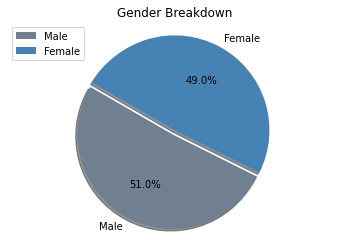

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
count = [958, 922]
colors = ["slategrey", "steelblue"]
explode = (.05,0)
plt.pie(count, colors=colors, startangle=150, shadow=True, autopct="%1.1f%%", labels=labels, explode=explode)
plt.legend(labels)
plt.title("Gender Breakdown")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_df = clean_df.loc[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


# Start by getting the last (greatest) timepoint for each mouse
drugs_df = drugs_df.groupby("Mouse ID").last()[["Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]

#create a for loop to find quartiles, IQR, outlier boundaries and potential outliers for Capomulin, Ramicane, Infubinol 
#and Ceftamin

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for drug in drugs:
    df = drugs_df.loc[drugs_df["Drug Regimen"]==drug]
    tumor = df["Tumor Volume (mm3)"]
    

#find the quartiles, iqr, outlier boundaries and potential outliers for Capomulin, Ramicane, Infubinol, and Ceftamin drug regimens

    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f'The lower quartile of tumors treated with {drug} is: {lowerq}.')
    print(f'The upper quartile of tumors treated with {drug} is: {upperq}.')
    print(f'The interquartile of tumors treated with {drug} range is: {iqr}')
    print(f'The median of tumors treated with {drug} is: {quartiles[0.5]}')    
    print(f'Values below {lower_bound} are potential outliers.')
    print(f'Values above {upper_bound} are potential outliers.')

The lower quartile of tumors treated with Capomulin is: 32.37735684.
The upper quartile of tumors treated with Capomulin is: 40.1592203.
The interquartile of tumors treated with Capomulin range is: 7.781863460000004
The median of tumors treated with Capomulin is: 38.125164399999996
Values below 20.70456164999999 are potential outliers.
Values above 51.83201549 are potential outliers.
The lower quartile of tumors treated with Ramicane is: 31.56046955.
The upper quartile of tumors treated with Ramicane is: 40.65900627.
The interquartile of tumors treated with Ramicane range is: 9.098536719999998
The median of tumors treated with Ramicane is: 36.56165229
Values below 17.912664470000003 are potential outliers.
Values above 54.30681135 are potential outliers.
The lower quartile of tumors treated with Infubinol is: 54.04860769.
The upper quartile of tumors treated with Infubinol is: 65.52574285.
The interquartile of tumors treated with Infubinol range is: 11.477135160000003
The median of tum

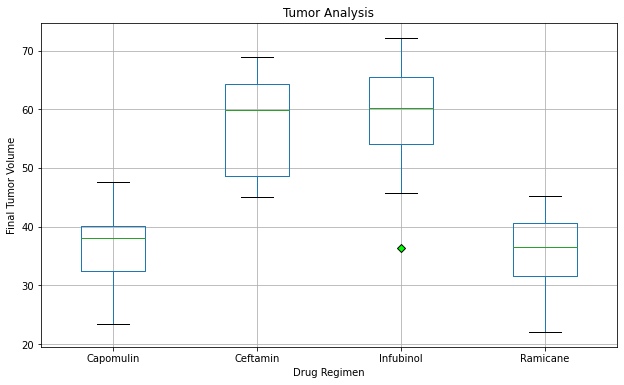

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers = dict(markerfacecolor='lime', marker='D')
drugs_df.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)", flierprops=outliers, figsize=(10,6))
plt.title("Tumor Analysis")
plt.suptitle('')
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

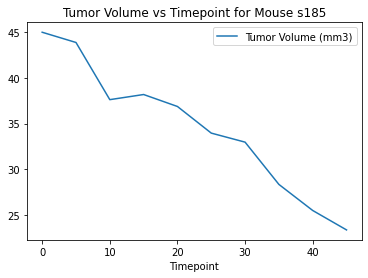

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] =="Capomulin"]
mouse_df = clean_df.loc[clean_df["Mouse ID"] =="s185"]
mouse_df.plot("Timepoint", "Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint for Mouse s185")
plt.show()

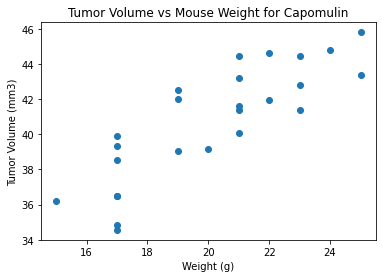

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_avg = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(tumor_avg["Weight (g)"], tumor_avg["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84


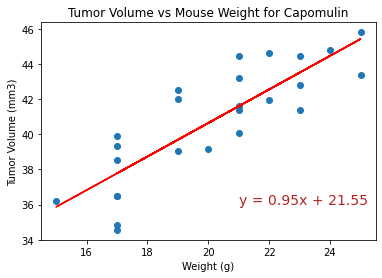

In [34]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = tumor_avg["Weight (g)"]
y_values = tumor_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(line_equation,(21,36), fontsize=14, color="firebrick")
plt.title("Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

correlation = st.pearsonr(tumor_avg["Weight (g)"], tumor_avg["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and tumor volume is {round(correlation[0],2)}')
plt.show()
